### Carregado funções e bibliotecas e organizando a base de dados que iremos usar. ###

In [345]:
def regressaoLinear(x,y):
    xizes = np.zeros([2,2])
    ypslon = np.zeros(2)
    
    xizes[0][0] = len(x)
    xizes[0][1] = xizes[1][0] = x.sum()
    xizes[1][1] = (x*x).sum()
    
    ypslon[0] = y.sum()
    ypslon[1] = (x*y).sum()
    
    
    return np.linalg.solve(xizes,ypslon)

def regressaoLinearMultipla(x,y): #x é uma matriz ao invés de vetor
    xizes = np.vstack((np.ones(len(x[0])),x))
    ypslon = xizes.dot(y)
    xizes = xizes.dot(xizes.T)
    return np.linalg.solve(xizes, ypslon)

def resolveLinVet(b,x):
    return b[0] + (b[1:]*x).sum(axis=0)

def resolveLin(b,x):
    return b[0] + b[1:]*x

def distanciaquad(y,yp):
    return ((y-yp)**2).sum()
    
def r2(y,yp):
    return 1- distanciaquad(y,yp)/((y-y.mean())**2).sum()

In [346]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

In [347]:
base = pd.read_csv("MICRODADOS_ENEM_ESCOLA.csv",delimiter=';',encoding="iso-8859-1")

base = base[(base.SG_UF_ESCOLA == "AM") & (base.INSE.notnull()) & 
            (base.NU_MATRICULAS.notnull())].sort_values(['NU_MEDIA_RED'], ascending = True)

base = base.drop(["NU_MEDIA_OBJ","NU_MEDIA_TOT","NO_ESCOLA_EDUCACENSO",
          "CO_ESCOLA_EDUCACENSO","CO_MUNICIPIO_ESCOLA",
          "CO_UF_ESCOLA","TP_DEPENDENCIA_ADM_ESCOLA","NU_MEDIA_CH",
           "NU_MEDIA_MT","INSE"],axis = 1)
base

,NU_ANO,SG_UF_ESCOLA,NO_MUNICIPIO_ESCOLA,TP_LOCALIZACAO_ESCOLA,NU_MATRICULAS,NU_PARTICIPANTES_NEC_ESP,NU_PARTICIPANTES,NU_TAXA_PARTICIPACAO,NU_MEDIA_CN,NU_MEDIA_LP,NU_MEDIA_RED,PC_FORMACAO_DOCENTE,NU_TAXA_PERMANENCIA,NU_TAXA_APROVACAO,NU_TAXA_REPROVACAO,NU_TAXA_ABANDONO,PORTE_ESCOLA
2864,2015,AM,Manaus,1,39,0.0,22,56.41,508.80,463.38,447.27,78.6,68.18,90.1,0.7,9.2,De 31 a 60 alunos
3940,2015,AM,Humaitá,1,250,1.0,180,72.00,510.64,447.16,454.56,68.0,79.44,87.8,5.6,6.6,Maior que 90 alunos
3678,2015,AM,Barreirinha,2,52,3.0,36,69.23,507.96,433.32,456.11,48.7,77.78,84.9,1.9,13.2,De 31 a 60 alunos
3611,2015,AM,Itacoatiara,2,24,0.0,14,58.33,510.17,443.39,458.57,56.9,78.57,90.2,0.0,9.8,De 1 a 30 alunos
2490,2015,AM,Coari,1,100,0.0,54,54.00,516.46,447.91,461.85,40.8,81.48,83.8,5.8,10.4,Maior que 90 alunos
3994,2015,AM,Coari,1,178,6.0,91,51.12,508.39,434.92,467.19,48.2,79.12,79.8,4.6,15.6,Maior que 90 alunos
3661,2015,AM,Urucurituba,1,167,0.0,106,63.47,504.87,432.97,468.30,40.1,88.68,88.8,4.5,6.7,Maior que 90 alunos
4372,2015,AM,Presidente Figueiredo,2,31,0.0,19,61.29,502.58,451.80,469.47,20.7,78.95,87.0,4.3,8.7,De 31 a 60 alunos
4219,2015,AM,Amaturá,1,70,0.0,44,62.86,504.48,435.52,475.00,37.5,84.09,89.9,10.1,0.0,De 61 a 90 alunos
4439,2015,AM,Manaus,1,24,0.0,21,87.50,529.69,461.66,475.24,53.2,95.24,97.9,1.0,1.1,De 1 a 30 alunos


### Analisando correlação entre variáveis. ###

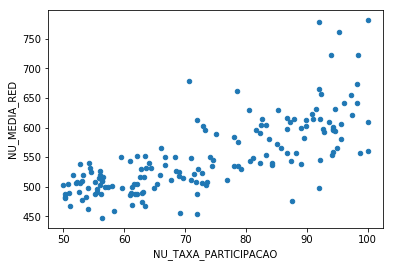

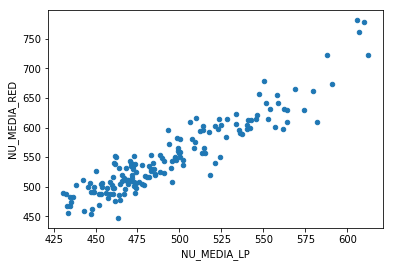

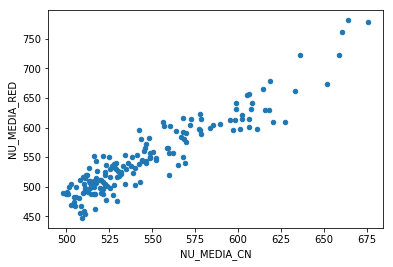

In [348]:
base.plot(kind='scatter',x='NU_TAXA_PARTICIPACAO',y='NU_MEDIA_RED')
base.plot(kind='scatter',x='NU_MEDIA_LP',y='NU_MEDIA_RED')
base.plot(kind='scatter',x='NU_MEDIA_CN',y='NU_MEDIA_RED')

#as 3 melhores correlações dessa base

## Regressões Lineares Simples###

0.8620243899966329
b = [-138.95528068    1.39461012]


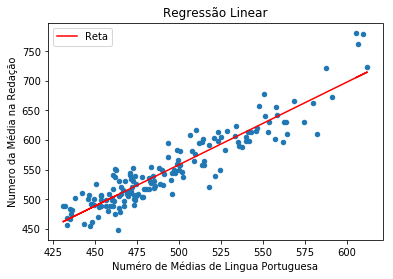

0.8719624221298531
b = [-260.59753074    1.4808434 ]


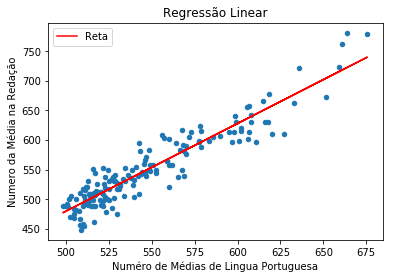

0.5367774663151625
b = [329.64563997   3.00545982]


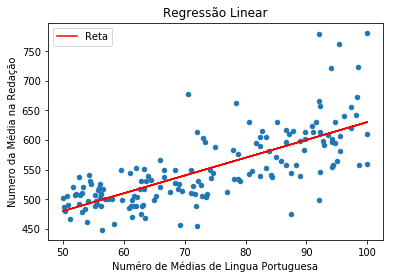

In [354]:
#X = Media em lingua portuguesa
x = base[(base.NU_MEDIA_LP).notnull()].NU_MEDIA_LP
y = base[(base.NU_MEDIA_RED).notnull()].NU_MEDIA_RED
b = regressaoLinear(x,y)
yp = resolveLin(b,x)
re = r2(y,yp)
print(re)
base.plot(kind='scatter',x='NU_MEDIA_LP',y='NU_MEDIA_RED')
print("b =",b)
plt.plot(x,resolveLin(b,x),'r',label="Reta")
plt.title("Regressão Linear")
plt.legend()
plt.xlabel("Numéro de Médias de Lingua Portuguesa")
plt.ylabel("Numero da Média na Redação")
plt.show()

#X = Media em lingua ciencias naturais

x = base[(base.NU_MEDIA_CN).notnull()].NU_MEDIA_CN
y = base[(base.NU_MEDIA_RED).notnull()].NU_MEDIA_RED
b = regressaoLinear(x,y)
yp = resolveLin(b,x)
re = r2(y,yp)
print(re)
base.plot(kind='scatter',x='NU_MEDIA_CN',y='NU_MEDIA_RED')
print("b =",b)
plt.plot(x,resolveLin(b,x),'r',label="Reta")
plt.title("Regressão Linear")
plt.legend()
plt.xlabel("Numéro de Médias de Lingua Portuguesa")
plt.ylabel("Numero da Média na Redação")
plt.show()

#X = Taxa de Participação

x = base[(base.NU_TAXA_PARTICIPACAO).notnull()].NU_TAXA_PARTICIPACAO
y = base[(base.NU_MEDIA_RED).notnull()].NU_MEDIA_RED
b = regressaoLinear(x,y)
yp = resolveLin(b,x)
re = r2(y,yp)
print(re)
base.plot(kind='scatter',x='NU_TAXA_PARTICIPACAO',y='NU_MEDIA_RED')
print("b =",b)
plt.plot(x,resolveLin(b,x),'r',label="Reta")
plt.title("Regressão Linear")
plt.legend()
plt.xlabel("Numéro de Médias de Lingua Portuguesa")
plt.ylabel("Numero da Média na Redação")
plt.show()

## Regressões Lineares Multiplas ###

2864    463.38
3940    447.16
3678    433.32
3611    443.39
2490    447.91
3994    434.92
3661    432.97
4372    451.80
4219    435.52
4439    461.66
2271    464.66
4197    457.68
4361    436.31
3631    434.92
2353    464.21
3217    452.27
4424    458.88
4299    467.19
2464    453.31
2582    460.65
4446    432.12
4000    456.27
2537    430.82
2930    473.37
3958    449.29
2481    448.20
4051    447.53
3463    467.27
3425    460.96
2389    456.72
         ...  
4377    533.47
3071    506.40
2840    582.09
4028    564.34
3580    541.07
2646    542.65
4027    523.47
2859    552.76
4333    528.59
2612    545.63
4467    509.99
2774    546.39
4017    533.71
2607    563.79
2789    574.41
2819    553.83
2715    562.57
2661    551.38
2815    558.41
4435    558.00
2706    547.38
2765    579.79
2738    568.67
3528    591.11
4120    550.53
4409    587.62
3923    612.12
2677    606.76
4383    609.83
3577    605.58
Name: NU_MEDIA_LP, Length: 164, dtype: float64


TypeError: object of type 'numpy.float64' has no len()

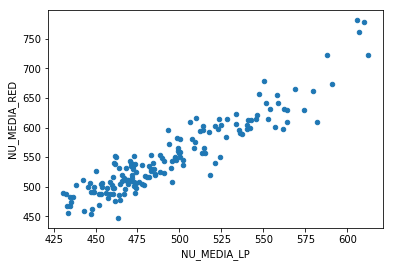

In [352]:
x = base[(base.NU_MEDIA_LP).notnull()].NU_MEDIA_LP
print(x)
y = base[(base.NU_MEDIA_RED).notnull()].NU_MEDIA_RED
base.plot(kind='scatter',x='NU_MEDIA_LP',y='NU_MEDIA_RED')

#Aqui voce pode escolher transpor ou nao, o importante eh ficar de acordo com seu codigo acima
b = regressaoLinearMultipla(x.values,y)
print("b =",b)
plt.plot(x,resolveLin(b,x),'r',label="Curva de Tendência")
plt.title("Regressão Quadrática")
plt.legend()
plt.xlabel("Critical_Score")
plt.ylabel("NA_Sales")
plt.show()